## INA219  
The INA219 is a current shunt and power monitor with programmable conversion times and filtering.  

Manufacturer link: http://www.ti.com/product/INA219  

Breakout board used: https://www.adafruit.com/product/904

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from meerkat.ina219 import INA219
from meerkat import base, parser, tools

In [2]:
import time

In [3]:
# bus number 1 on Raspberry Pi
dev = INA219(bus_n=1, bus_addr=0x40, output='csv')

In [4]:
dev.verbose = True

#### Configuration

In [5]:
# reset all configuration settings
dev.reset()

Writing to 'config' registry # 0
HEX value: 0xb99f
Binary value:
1011100110011111
1111110000000000
5432109876543210


Example only uses "Simple Current Shunt Monitor Usage" (see section 8.5.3 in datasheet) defaults:  
* 12-bit resolution  
* 320 mV shunt full scale range (PGA = /8)  
* 32 V bus full scale range  
* Continuous conversion of shunt and bus voltage

In [6]:
cal = dev.get_config()

Bus Voltage Range: 32 V
PGA Range: 8x or +/- 320 mV
Configuration Register:
HEX value: 0x399f
Binary value:
0011100110011111
1111110000000000
5432109876543210


#### Measurement

For this example, device is connected to a Raspberry Pi 3 5V supply.

In [7]:
dev.get_bus_voltage()

17.888

In [8]:
dev.get_shunt_voltage()

0.008450000000000001

In [9]:
a = []
for i in range(20):
    
    bv = dev.get_bus_voltage()
    sv = dev.get_shunt_voltage()
    a.append([bv, sv])
    time.sleep(0.5)
a

[[17.888, 0.008440000000000001],
 [17.884, 0.00846],
 [17.884, 0.008450000000000001],
 [17.884, 0.00843],
 [17.884, 0.00846],
 [17.884, 0.008440000000000001],
 [17.888, 0.00842],
 [17.884, 0.00842],
 [17.884, 0.008450000000000001],
 [17.888, 0.008440000000000001],
 [17.888, 0.008450000000000001],
 [17.888, 0.008440000000000001],
 [17.888, 0.00841],
 [17.888, 0.00842],
 [17.884, 0.00847],
 [17.884, 0.00843],
 [17.888, 0.008440000000000001],
 [17.888, 0.00842],
 [17.888, 0.008440000000000001],
 [17.884, 0.008450000000000001]]

In [10]:
dev.get_current_simple()

0.0842

#### Calibration

Calibration Register enables the user to scale the Current Register and Power Register to the most useful value for a given application.  Refer to the datasheet for details

In [11]:
# confirm calibration value
dev.get_calibration()

0

In [12]:
dev.get_shunt_voltage()

0.00843

In [13]:
dev.get_bus_voltage()

17.892

In [14]:
# simple return, just float
dev.get_current_simple()

0.0845

In [15]:
# get method, list with description and sample number
dev.get(description='test_1', n=5)

[['test_1', 1, 17.884, 0.0846],
 ['test_1', 2, 17.884, 0.0847],
 ['test_1', 3, 17.888, 0.0845],
 ['test_1', 4, 17.884, 0.0844],
 ['test_1', 5, 17.888, 0.0842]]

#### JSON Data Publishing

In [16]:
# lower metadata interval from a default of once every 10 samples
dev.json_writer.metadata_interval = 3

In [17]:
# writing method with description and sample number
dev.publish(description='test_2', n=5)

['{"description": "test_2", "sample_n": 0, "voltage": 17.884, "current": 0.0846, "std_time_ms": "2020-01-27 22:31:22.948433"}',
 '{"description": "test_2", "sample_n": 1, "voltage": 17.884, "current": 0.0846, "std_time_ms": "2020-01-27 22:31:22.951744"}',
 '{"description": null, "sample_n": 2, "voltage": 17.888, "current": 0.0844, "std_time_ms": "2020-01-27 22:31:22.954974", "name": "INA219", "title": null, "format": null, "encoding": "utf-8", "bytes": null, "hash": null, "schema": null, "sources": null, "licenses": null, "line_terminator": "\\n", "quote_char": "\\"", "double_quote": true, "escape_char": "\\\\", "null_sequence": "NA", "comment": "#", "skip_lines": 0, "path": null, "device": {"name": "INA219", "version_hw": "1.0", "version_sw": "1.0", "accuracy": null, "precision": "12bit", "bus": "<meerkat.i2c_pi.WrapI2C object at 0xad01cb90>", "state": null, "active": null, "error": null, "dtype": null, "description": "Texas Instruments Bidirectional Current Monitor", "urls": "www.ti.

#### JSON Writer Output

In [18]:
# default writer format is CSV, switch to JSON
dev.writer_output = 'json'

In [19]:
# writer method with description and sample number
dev.write(description='test_3', n=30)

In [20]:
dev.json_writer.path

'2020_01_27_22_31_23.jsontxt'

In [21]:
with open(dev.json_writer.path, 'r') as f:
    for _ in range(4):
        print(f.readline().strip())

{"description": "test_3", "sample_n": 0, "voltage": 17.888, "current": 0.0843, "std_time_ms": "2020-01-27 22:31:23.076394"}
{"description": "test_3", "sample_n": 1, "voltage": 17.884, "current": 0.0845, "std_time_ms": "2020-01-27 22:31:23.082370"}
{"description": null, "sample_n": 2, "voltage": 17.888, "current": 0.0842, "std_time_ms": "2020-01-27 22:31:23.095636", "name": "INA219", "title": null, "format": null, "encoding": "utf-8", "bytes": null, "hash": null, "schema": null, "sources": null, "licenses": null, "line_terminator": "\n", "quote_char": "\"", "double_quote": true, "escape_char": "\\", "null_sequence": "NA", "comment": "#", "skip_lines": 0, "path": "2020_01_27_22_31_23.jsontxt", "device": {"name": "INA219", "version_hw": "1.0", "version_sw": "1.0", "accuracy": null, "precision": "12bit", "bus": "<meerkat.i2c_pi.WrapI2C object at 0xad01cb90>", "state": null, "active": null, "error": null, "dtype": null, "description": "Texas Instruments Bidirectional Current Monitor", "urls

#### CSV Writer Output

In [22]:
# switch back to CSV format
dev.writer_output = 'csv'

In [23]:
# writer method with description and sample number
dev.write(description='test_4', n=30)

In [24]:
dev.csv_writer.path

'2020_01_27_22_31_24_data.csv'

In [25]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.csv_writer.path)

#### Metadata in CSV

In [26]:
m

{'name': 'INA219',
 'title': None,
 'description': None,
 'format': None,
 'encoding': 'utf-8',
 'bytes': None,
 'hash': None,
 'schema': None,
 'sources': None,
 'licenses': None,
 'line_terminator': '\n',
 'quote_char': '"',
 'double_quote': True,
 'escape_char': '\\',
 'null_sequence': 'NA',
 'comment': '#',
 'skip_lines': 1,
 'path': '2020_01_27_22_31_24_data.csv',
 'device': {'name': 'INA219',
  'version_hw': '1.0',
  'version_sw': '1.0',
  'accuracy': None,
  'precision': '12bit',
  'bus': '<meerkat.i2c_pi.WrapI2C object at 0xad01cb90>',
  'state': None,
  'active': None,
  'error': None,
  'dtype': None,
  'description': 'Texas Instruments Bidirectional Current Monitor',
  'urls': 'www.ti.com/product/ADS1115',
  'manufacturer': 'Texas Instruments',
  'calibration_date': None,
  'bus_voltage_range': 32,
  'gain': 8,
  'gain_string': '+/- 320 mV',
  'bus_adc_resolution': 12,
  'bus_adc_averaging': None,
  'shunt_adc_resolution': 12,
  'shunt_adc_averaging': None,
  'mode': 7,
  'm

#### Parsed CSV data

In [27]:
df.head()

,std_time_ms,description,sample_n,voltage,current,datetime64_ns
0,2020-01-27 22:31:24.760923,test_4,0,17.884,0.0843,2020-01-27 22:31:24.760923
1,2020-01-27 22:31:24.768057,test_4,1,17.888,0.0842,2020-01-27 22:31:24.768057
2,2020-01-27 22:31:24.780047,test_4,2,17.888,0.0843,2020-01-27 22:31:24.780047
3,2020-01-27 22:31:24.786014,test_4,3,17.888,0.0841,2020-01-27 22:31:24.786014
4,2020-01-27 22:31:24.792113,test_4,4,17.888,0.0841,2020-01-27 22:31:24.792113


In [28]:
# Pandas 0.24.1 hack
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')

In [29]:
def plot_2ax(df, x, y0, y1):
    fig0, ax0 = plt.subplots()
    ax1 = ax0.twinx()
    ax0.plot(df[x], df[y0], label=y0, color="orange", marker="x")
    ax0.plot([df[x].min(), df[x].max()],
             [df[y0].mean(), df[y0].mean()], color="orange",
             linestyle=":")
    ax1.plot(df[x], df[y1], label=y1, color="green", marker="+")
    ax1.plot([df[x].min(), df[x].max()],
             [df[y1].mean(), df[y1].mean()], color="green",
             linestyle=":")
    ax0.set_ylabel(y0)
    ax1.set_ylabel(y1)
    
    ax0.yaxis.set_major_formatter(FormatStrFormatter('%2.4f'))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.4f'))
    
    plt.show()
    plt.close()

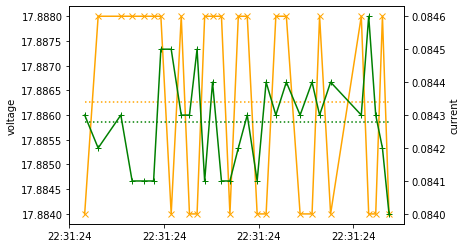

In [30]:
plot_2ax(df=df, x="datetime64_ns", y0="voltage", y1="current")

In [31]:
dt = df.datetime64_ns[len(df)-1]-df.datetime64_ns[0]
dtt = dt.seconds + dt.microseconds / 10**6
print('Sample Rate: {:.4f} Hz'.format(len(df)/dtt))

Sample Rate: 186.4211 Hz
